In [1]:
from facenet_pytorch import MTCNN
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
mtcnn = MTCNN(select_largest=False, post_process=False, device='cuda:0')

In [ ]:
v_cap = cv2.VideoCapture('./videoplayback.mp4')
v_cap.set(cv2.CAP_PROP_POS_FRAMES, 30)
success, frame = v_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

(np.float64(-0.5), np.float64(1279.5), np.float64(719.5), np.float64(-0.5))

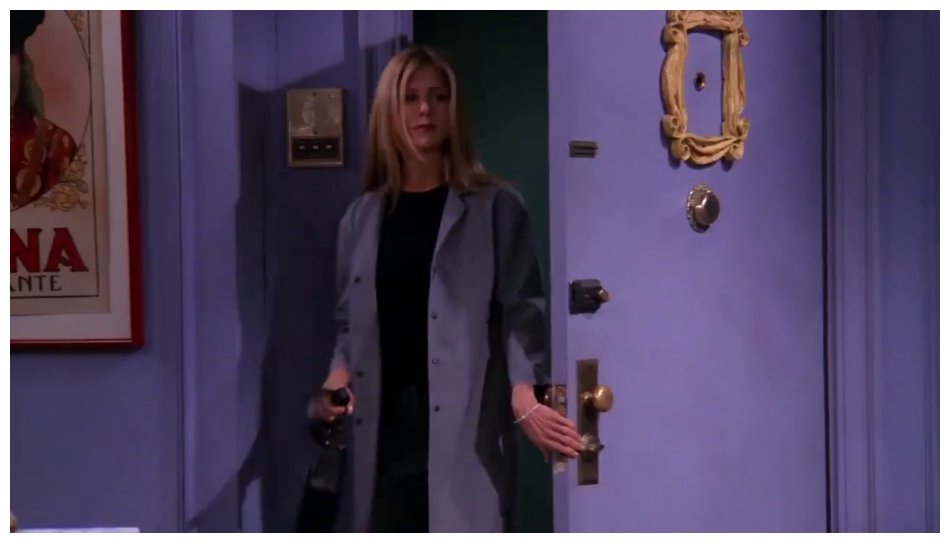

In [4]:
plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')

In [5]:
face = mtcnn(frame)
face.shape

torch.Size([3, 160, 160])

(np.float64(-0.5), np.float64(159.5), np.float64(159.5), np.float64(-0.5))

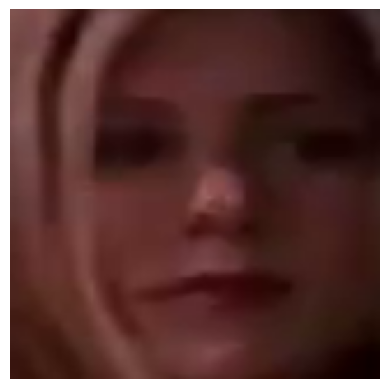

In [6]:
plt.imshow(face.permute(1, 2, 0).int().numpy())
plt.axis('off')

In [7]:
mtcnn = MTCNN(margin=20, keep_all=True, post_process=False, device='cuda:0')

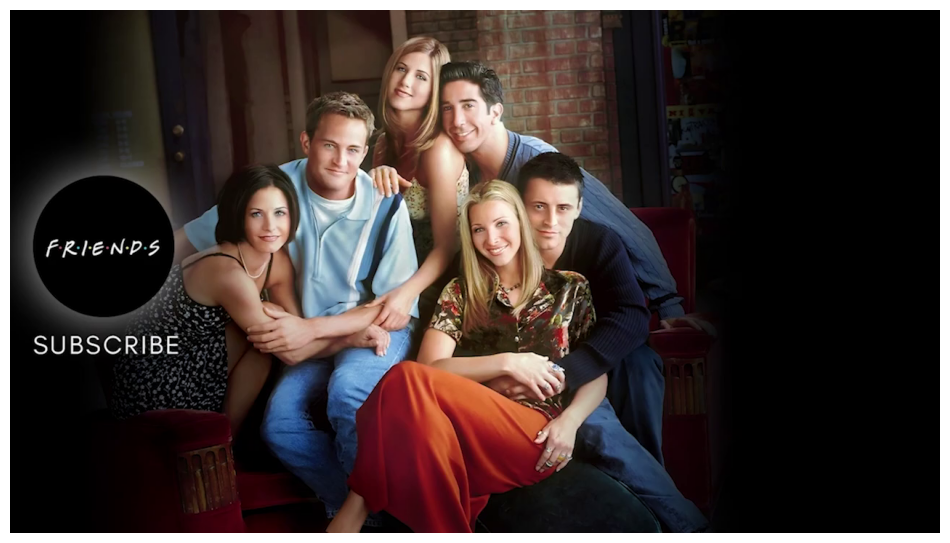

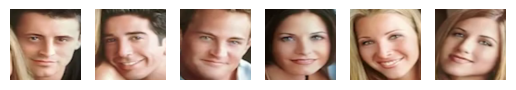

In [8]:
v_cap.set(cv2.CAP_PROP_POS_FRAMES, 2350)
success, frame = v_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

plt.figure(figsize=(12, 8))
plt.imshow(frame)
plt.axis('off')
plt.show()

faces = mtcnn(frame)
fig, axis = plt.subplots(1, len(faces))
for face, ax in zip(faces, axis):
    ax.imshow(face.permute(1,2,0).int().numpy())
    ax.axis('off')
plt.show()


  0%|          | 0/100 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Detected face per frame')

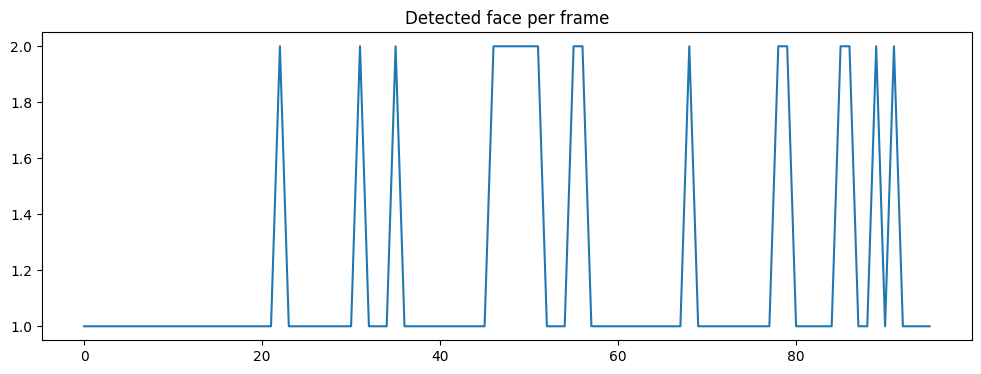

In [ ]:
v_cap = cv2.VideoCapture('./videoplayback.mp4')
batch_size = 16
frames = []
faces = []

for _ in tqdm(range(500, 600)):
    success, frame = v_cap.read()
    if not success: continue
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(Image.fromarray(frame))
    if len(frames) >= batch_size:
        faces.extend(mtcnn(frames))
        frames = []
plt.figure(figsize=(12, 4))
plt.plot([len(f) if f is not None else 0 for f in faces])
plt.title("Detected face per frame")

In [18]:
del(mtcnn)

In [19]:
mtcnn = MTCNN(keep_all=True, device='cuda:0')

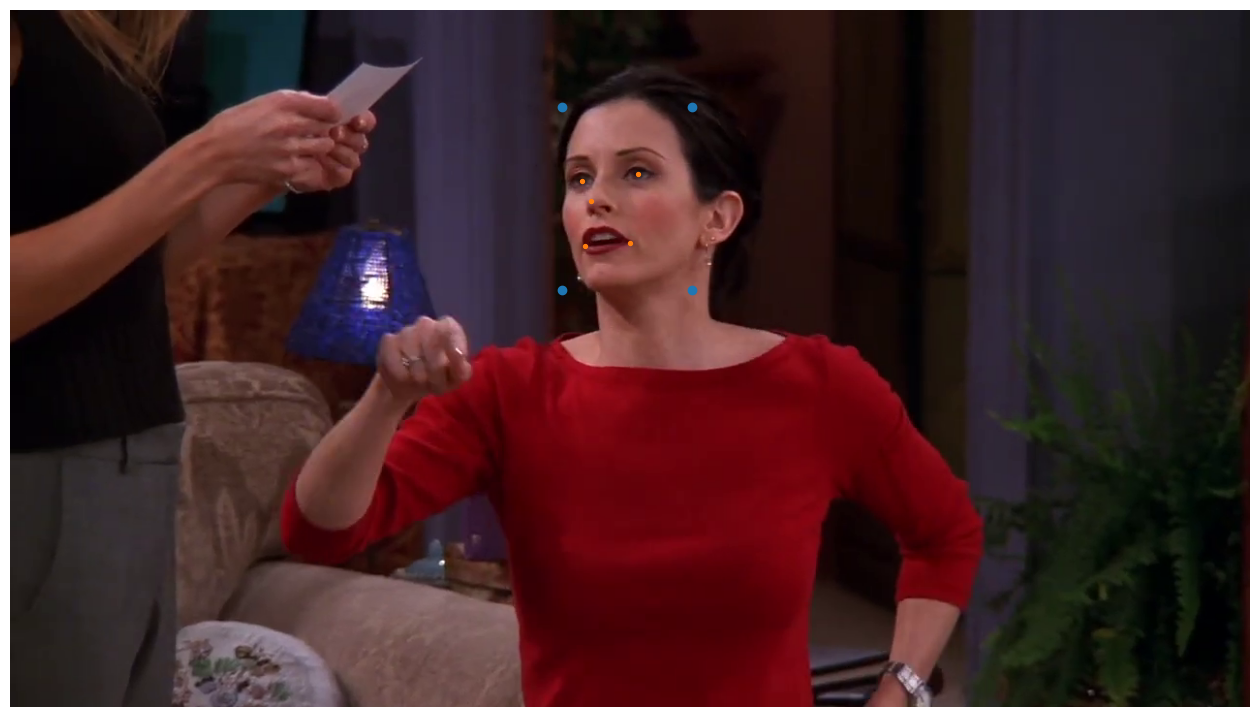

In [72]:
v_cap.set(cv2.CAP_PROP_POS_FRAMES, 790)
success, frame = v_cap.read()
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame = Image.fromarray(frame)

boxes, probs, landmarks = mtcnn.detect(frame, landmarks=True)

fig, ax = plt.subplots(figsize=(16, 12))
ax.imshow(frame)
ax.axis('off')

for box, landmark in zip(boxes, landmarks):
    ax.scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]))
    ax.scatter(landmark[:, 0], landmark[:, 1], s=8)
plt.show()

  0%|          | 0/300 [00:00<?, ?it/s]

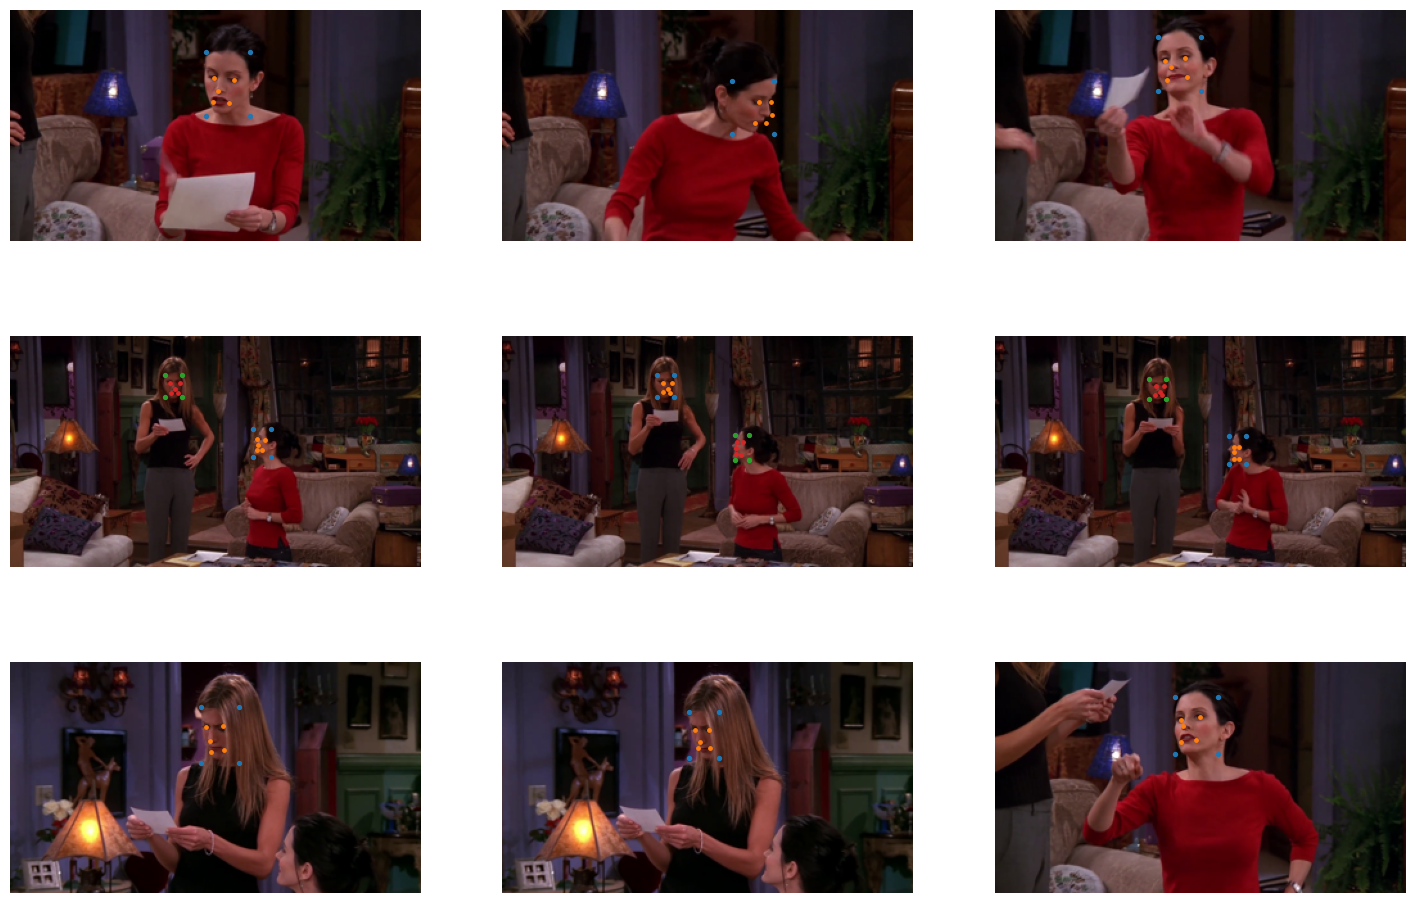

In [85]:
batch_size = 32
frames = []
boxes = []
landmarks = []
view_frames = []
view_boxes = []
view_landmarks = []
for _ in tqdm(range(1000, 1300)):
    
    success, frame = v_cap.read()
    if not success: continue
        
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = Image.fromarray(frame)
    frame = frame.resize([int(f * 0.25) for f in frame.size])
    frames.append(frame)
    
    if len(frames) >= batch_size:
        batch_boxes, _, batch_landmarks = mtcnn.detect(frames, landmarks=True)
        boxes.extend(batch_boxes)
        landmarks.extend(batch_landmarks)
        
        view_frames.append(frames[-1])
        view_boxes.append(boxes[-1])
        view_landmarks.append(landmarks[-1])
        
        frames = []

fig, ax = plt.subplots(3, 3, figsize=(18, 12))
for i in range(9):
    ax[int(i / 3), i % 3].imshow(view_frames[i])
    ax[int(i / 3), i % 3].axis('off')
    for box, landmark in zip(view_boxes[i], view_landmarks[i]):
        ax[int(i / 3), i % 3].scatter(*np.meshgrid(box[[0, 2]], box[[1, 3]]), s=8)
        ax[int(i / 3), i % 3].scatter(landmark[:, 0], landmark[:, 1], s=6)